## **Projeto unicórnios**

Nesse projeto foi feito uma análise de startups que se transformaram em empresas
unicórnios. No projeto podemos encontrar um filtro onde encontramos as empresas brasileira que se transformaram em unicórnios. 

A base de dados analisada foi retirada do site Kaggle. 

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)



In [ ]:
# Importando as bibliotecas
# (importing libraries)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# Lendo a base de
# (reading the data)
data_base = pd.read_csv('Startups+in+2021+end.csv')

# Imprimindo os primeiros registros 
# (firts records)
data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
# Verificando informações sobre a base de dados
# (check information)

data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
# verificar campos nulos
# (check null fields)
data_base.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

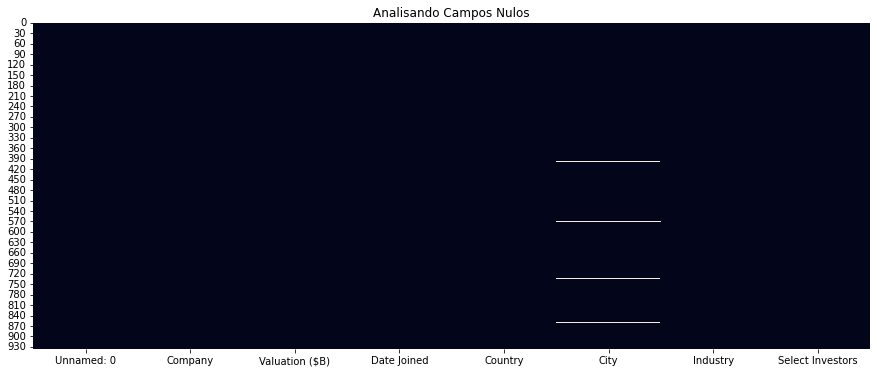

In [ ]:
# visualizando os campos nulos no gráfico
# OBS: No gráfico abaixo podemos ver que existem apenas campos nulos no
# coluna cidade

# (visualizing the null fields in the graph
# NOTE: In the graph below we can see that there are only null fields in the 
# city column)

plt.figure(figsize=(15, 6))
plt.title('Analisando Campos Nulos')
sns.heatmap(data_base.isnull(), cbar=False); 

In [ ]:
# Rank de valores unicos 
# (Rank of unique values)

data_base['Industry'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

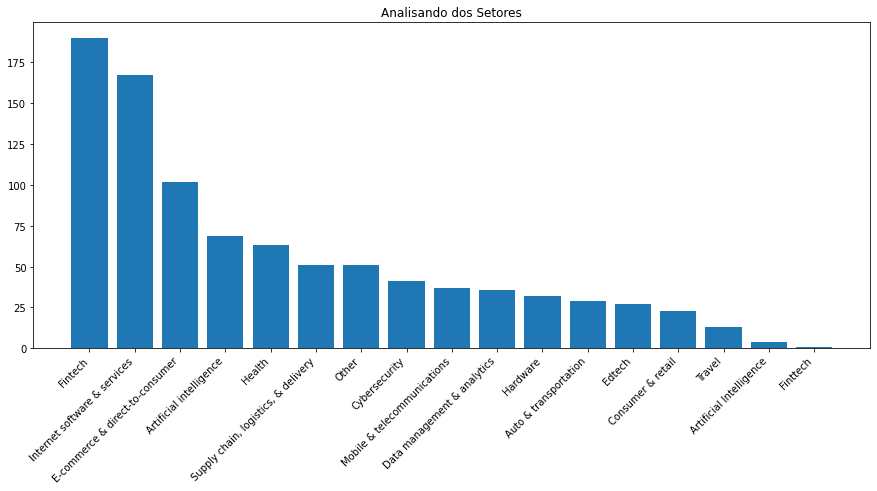

In [ ]:
# plotando em um grafico de bar para podemos analisar o valores acima
# (plotting on a bar chart so we can analyze the above values) 

plt.figure(figsize=(15, 6))
plt.title('Analisando dos Setores')
plt.bar(data_base['Industry'].value_counts().index, data_base['Industry'].value_counts())
plt.xticks( rotation=45, ha='right');

In [ ]:
# Paises que mais gera empresas unicórnios 
# (Countries that generate the most unicorn companies)

analise = round(data_base['Country'].value_counts( normalize = True) * 100, 2)
analise

United States           50.96
China                   18.06
India                    5.45
United Kingdom           3.95
Germany                  2.46
Israel                   2.24
France                   2.03
Canada                   1.60
Brazil                   1.60
South Korea              1.18
Singapore                1.18
Hong Kong                0.75
Japan                    0.64
Australia                0.64
Mexico                   0.53
Netherlands              0.53
Indonesia                0.43
Spain                    0.43
Sweden                   0.43
Switzerland              0.43
Ireland                  0.32
United Arab Emirates     0.32
Norway                   0.32
Belgium                  0.21
Thailand                 0.21
Denmark                  0.21
Philippines              0.21
Finland                  0.21
Colombia                 0.21
South Africa             0.21
Turkey                   0.21
Austria                  0.21
Chile                    0.11
Malaysia  

**OBS:** Com o resultado acima, podemos analizar que o brasil e o 9° país que gera mais unicórnio no mundo e está empatado com o canadá

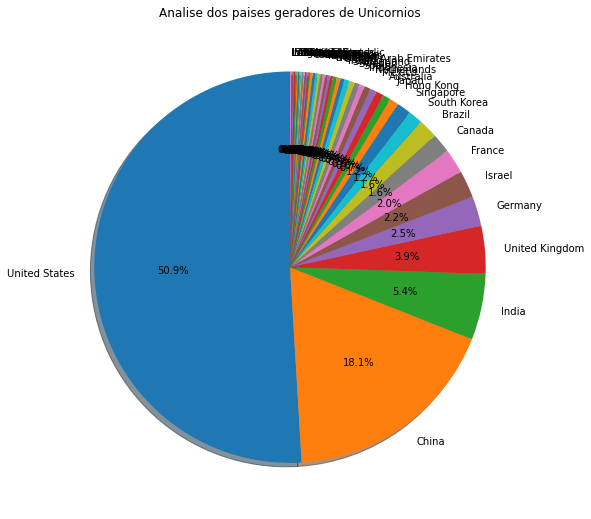

In [ ]:
# Plotando geral dos paises em um grafico pizza com os dados acima  
# (Plotting country overview on a pie chart with the above data)

plt.figure(figsize=(20, 9))
plt.title('Analise dos paises geradores de Unicornios')
plt.pie(
    analise, 
    labels = analise.index,
    shadow=True,
    startangle=90, 
    autopct='%1.1f%%'
);

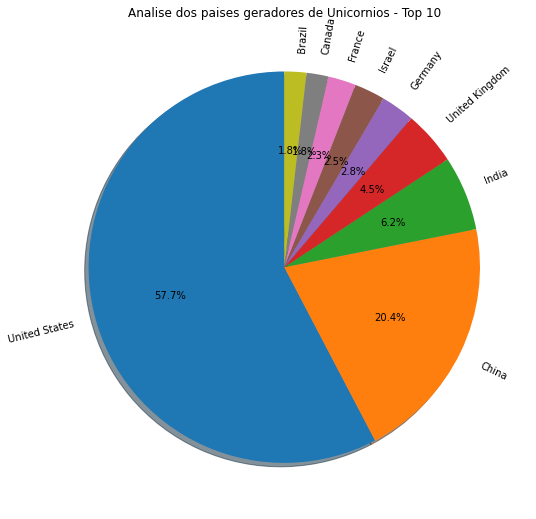

In [ ]:
# Plot com apenas os 9 paises 
# (Plot with only 9 countries)

plt.figure(figsize=(20, 9))
plt.title('Analise dos paises geradores de Unicornios - Top 10')
plt.pie(
    analise.head(9), 
    labels = analise.index[0:9],
    shadow=True,
    startangle=90, 
    autopct='%1.1f%%',
    rotatelabels=True
);



In [ ]:
# Convertendo a coluna Date Joined para formato de data
# (Converting Date Joined Column to Date Format)

data_base['Date Joined'] = pd.to_datetime(data_base['Date Joined'])

In [ ]:
# Criando uma nova coluna com meses e os ano na nossa base de dados
# (Creating a new column with months and years in our database)

data_base['Month'] = pd.DatetimeIndex(data_base['Date Joined']).month
data_base['Year'] = pd.DatetimeIndex(data_base['Date Joined']).year

data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# realizando uma tabela analitica e utilizando o groupby para junta os dados 
# (making an analytical table and using groupby to join the data)

analise_agrupada = data_base.groupby(by=['Country', 'Year', 'Month', 'Company']).count()['Unnamed: 0'].reset_index()
analise_agrupada

,Country,Year,Month,Company,Unnamed: 0
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [ ]:
# Realizando um filtro para acha os dados do brasil
# (Performing a filter to find data from Brazil)

analise_agrupada.loc[analise_agrupada['Country'] == 'Brazil']

,Country,Year,Month,Company,Unnamed: 0
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
# Transformando a coluna valor em float e tirando o $
# (Transforming the value column into float and removing the $) 

data_base['Valuation ($B)'] = pd.to_numeric(data_base['Valuation ($B)'].apply(lambda linha: linha.replace('$', '')))
data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Analisando os pais que geral maior valor de mercado em empresas unicornios 
# (Analyzing the countries that generate the highest market value in unicorn companies)

analise_pais = data_base.groupby(by=['Country']).sum()['Valuation ($B)'].reset_index()
analise_pais.sort_values('Valuation ($B)', ascending=False)

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


**OBS:**Podemos analisar que o Brasil e o quinto país do mundo que mais gera empresas unicórnios. 

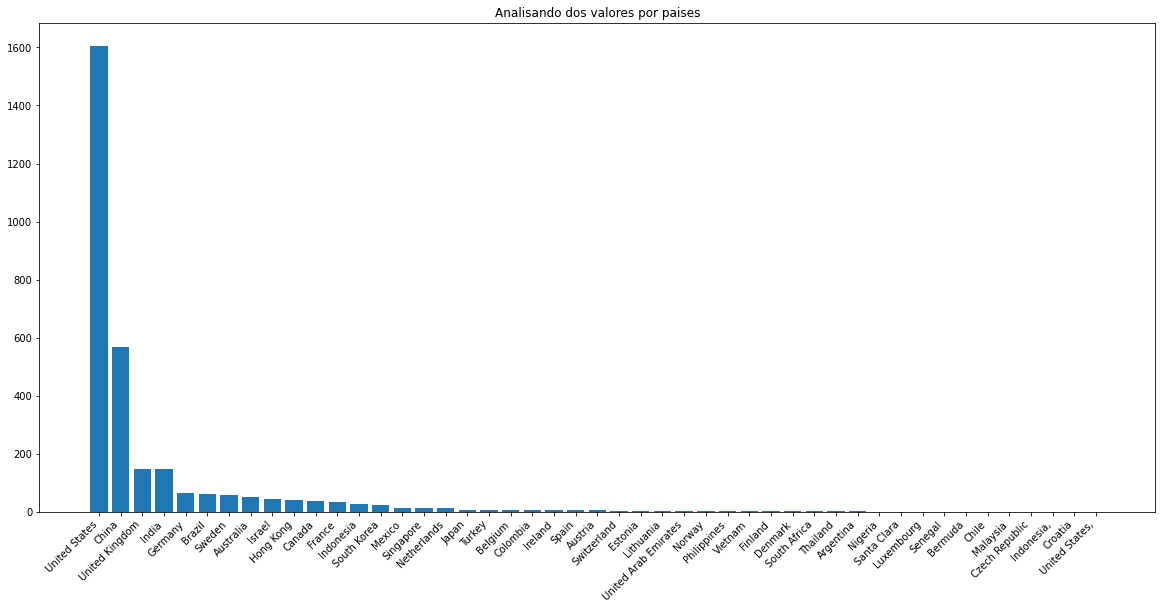

In [ ]:
# Plotando em grafico os dados acimas 
# (Graphing the above data)

analise_valor = analise_pais.sort_values('Valuation ($B)', ascending=False)

plt.figure(figsize=(20, 9))
plt.title('Analisando dos valores por paises')
plt.bar(analise_valor['Country'], analise_valor['Valuation ($B)'])
plt.xticks( rotation=45, ha='right');